In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *
import numpy as np
import pandas as pd
from markov_models.experiments import exp1
from mpl_toolkits.axes_grid1 import make_axes_locatable
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os

from utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

import dataframe_image as dfi

In [48]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(7)]

main_folder = 'availability_matrices'

formatted_array = [i for i in range(n_rounds)]

In [49]:
def correlation_analysis(av_mat_name, folder):
    """
    ...
    """
    time_corr_df = pd.DataFrame(columns=['lambda2', 'pearson', 'hamming', 'MIS'], index = [i+1 for i in range(NO_CLIENTS)])

    # x --- load availability matrix --- x #
    av_mat_path = os.path.join('..', folder, 'av-mat_'+av_mat_name+".csv")
    availability_matrix = pd.DataFrame(pd.read_csv(av_mat_path, index_col=[0]))
    availability_matrix = availability_matrix.set_axis([i for i in range(100)], axis=1)
    availability_matrix = availability_matrix.set_axis([i+1 for i in range(7)], axis=0) # NEW!

    # x --- plot availability matrix --- x #
    plt.figure(figsize=(7, 2))
    ax = plt.subplot()
    cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
    sns.heatmap(availability_matrix.astype(int), annot=False, fmt='d', cbar=False, cmap=cmap, linewidths=0.5, linecolor='white', ax=ax) # create heatmap
    xticks = ax.get_xticks()
    xticks = xticks[::2]
    ax.set_xticks(xticks) # set new xticks
    plt.title(av_mat_name)
    plt.show()


    # x --- lambda2 correlation --- x #
    lam2_list, corr = av_mat_corr(availability_matrix)
    print('Markov Chains lambda 2:')
    print('Countries lambda_2: ',list(np.round(lam2_list, 2)))
    print('Mean lambda_2: ',np.round(corr, 2))
    print('x --------------- x')
    time_corr_df['lambda2'] = lam2_list


    # x --- pearson correlation --- x #
    t_corr_list, t_corr_mean, sp_corr_dict, sp_corr_mean = av_mat_p_corr(availability_matrix)
    print('Peasron correlation:')
    print('Time list: ',list(np.round(t_corr_list, 2)))
    print('Time mean: ',np.round(t_corr_mean, 2))
    print('Spatial dict: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    print('Spatial mean: ',np.round(sp_corr_mean, 2))
    print('x --------------- x')
    time_corr_df['pearson'] = t_corr_list

    sp_corr_m = np.zeros((NO_CLIENTS, NO_CLIENTS))
    for key, value in sp_corr_dict.items():
        i, j = map(int, key.split('-'))
        sp_corr_m[i-1][j-1] = value
        sp_corr_m[j-1][i-1] = value 
    np.fill_diagonal(sp_corr_m, 1.0)   
    plt.figure(figsize=(7, 2))
    sns.heatmap(sp_corr_m, annot=True, cbar=True)  # Adding a color map and color bar
    plt.xticks(ticks=np.arange(7) + 0.5, labels=[1, 2, 3, 4, 5, 6, 7], rotation=0)  # Set x-ticks and labels
    plt.yticks(ticks=np.arange(7) + 0.5, labels=[1, 2, 3, 4, 5, 6, 7], rotation=0)
    plt.title(label=f"{av_mat_name} Pearson")
    plt.savefig('av_mat_spatial_corr/'+av_mat_name+'-pearson.png', bbox_inches='tight')
    plt.show()


    # x --- hamming similarity --- x #
    t_corr_list, t_corr_mean, sp_corr_dict, sp_corr_mean = hamming_similarity(availability_matrix)
    print('Hamming similarity:')
    print('Time list: ',list(np.round(t_corr_list, 2)))
    print('Time mean: ',np.round(t_corr_mean, 2))
    print('Spatial dict: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    print('Spatial mean: ',np.round(sp_corr_mean, 2))
    print('x --------------- x')
    time_corr_df['hamming'] = t_corr_list

    sp_corr_m = np.zeros((NO_CLIENTS, NO_CLIENTS))
    for key, value in sp_corr_dict.items():
        i, j = map(int, key.split('-'))
        sp_corr_m[i-1][j-1] = value
        sp_corr_m[j-1][i-1] = value 
    np.fill_diagonal(sp_corr_m, 1.0)   
    plt.figure(figsize=(7, 2))
    sns.heatmap(sp_corr_m, annot=True, cbar=True)  # Adding a color map and color bar
    plt.xticks(ticks=np.arange(7) + 0.5, labels=[1, 2, 3, 4, 5, 6, 7], rotation=0)  # Set x-ticks and labels
    plt.yticks(ticks=np.arange(7) + 0.5, labels=[1, 2, 3, 4, 5, 6, 7], rotation=0)
    plt.title(label=f"{av_mat_name} Hamming")
    plt.savefig('av_mat_spatial_corr/'+av_mat_name+'-hamming.png', bbox_inches='tight')
    plt.show()

    # x --- MIS correlation --- x #
    t_corr_list, t_corr_mean, sp_corr_dict, sp_corr_mean = mis(availability_matrix)
    print('Mutual Information Score:')
    print('Time list: ',list(np.round(t_corr_list, 2)))
    print('Time mean: ',np.round(t_corr_mean, 2))
    print('Spatial dict: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    print('Spatial mean: ',np.round(sp_corr_mean, 2))
    time_corr_df['MIS'] = t_corr_list

    sp_corr_m = np.zeros((NO_CLIENTS, NO_CLIENTS))
    for key, value in sp_corr_dict.items():
        i, j = map(int, key.split('-'))
        sp_corr_m[i-1][j-1] = value
        sp_corr_m[j-1][i-1] = value    
    np.fill_diagonal(sp_corr_m, 1.0)
    plt.figure(figsize=(7, 2))
    sns.heatmap(sp_corr_m, annot=True, cbar=True)  # Adding a color map and color bar
    plt.xticks(ticks=np.arange(7) + 0.5, labels=[1, 2, 3, 4, 5, 6, 7], rotation=0)  # Set x-ticks and labels
    plt.yticks(ticks=np.arange(7) + 0.5, labels=[1, 2, 3, 4, 5, 6, 7], rotation=0)
    plt.title(f"{av_mat_name} MIS")
    plt.savefig('av_mat_spatial_corr/'+av_mat_name+'-MIS.png', bbox_inches='tight')
    plt.show()

    time_corr_df = time_corr_df.style.background_gradient().format('{:.2f}')
    dfi.export(time_corr_df, 'av_mat_time_corr/'+av_mat_name+'-time-corr.png')

    print('xxxxxxxxxxxxxxxxxxxxxxxxxxx')

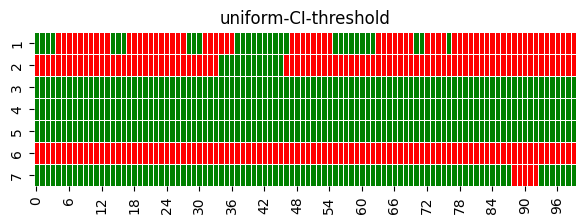

Markov Chains lambda 2:
Countries lambda_2:  [0.69, 0.91, 1.0, 1.0, 1.0, 1.0, 0.79]
Mean lambda_2:  0.91
x --------------- x
Peasron correlation:
Time list:  [0.69, 0.91, 1.0, 1.0, 1.0, 1.0, 0.79]
Time mean:  0.91
Spatial dict:  {'1-2': 0.35, '1-3': nan, '1-4': nan, '1-5': nan, '1-6': nan, '1-7': 0.15, '2-3': nan, '2-4': nan, '2-5': nan, '2-6': nan, '2-7': 0.08, '3-4': nan, '3-5': nan, '3-6': nan, '3-7': nan, '4-5': nan, '4-6': nan, '4-7': nan, '5-6': nan, '5-7': nan, '6-7': nan}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


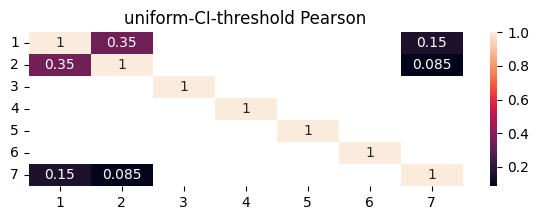

Hamming similarity:
Time list:  [0.87, 0.98, 1.0, 1.0, 1.0, 1.0, 0.98]
Time mean:  0.98
Spatial dict:  {'1-2': 0.75, '1-3': 0.31, '1-4': 0.31, '1-5': 0.31, '1-6': 0.69, '1-7': 0.36, '2-3': 0.12, '2-4': 0.12, '2-5': 0.12, '2-6': 0.88, '2-7': 0.17, '3-4': 1.0, '3-5': 1.0, '3-6': 0.0, '3-7': 0.95, '4-5': 1.0, '4-6': 0.0, '4-7': 0.95, '5-6': 0.0, '5-7': 0.95, '6-7': 0.05}
Spatial mean:  0.48
x --------------- x


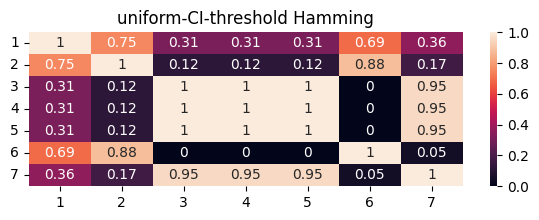

Mutual Information Score:
Time list:  [0.24, 0.28, 0.0, 0.0, 0.0, 0.0, 0.12]
Time mean:  0.09
Spatial dict:  {'1-2': 0.06, '1-3': 0.0, '1-4': 0.0, '1-5': 0.0, '1-6': 0.0, '1-7': 0.02, '2-3': 0.0, '2-4': 0.0, '2-5': 0.0, '2-6': 0.0, '2-7': 0.01, '3-4': 0.0, '3-5': 0.0, '3-6': 0.0, '3-7': 0.0, '4-5': 0.0, '4-6': 0.0, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.0}
Spatial mean:  0.0


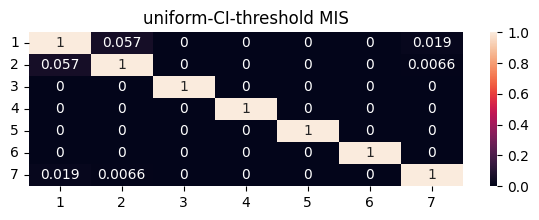

xxxxxxxxxxxxxxxxxxxxxxxxxxx


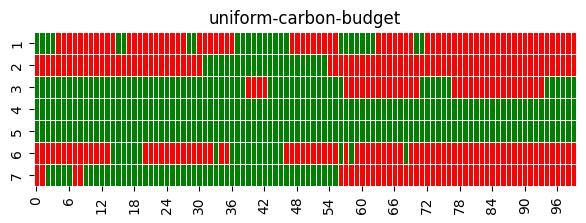

Markov Chains lambda 2:
Countries lambda_2:  [0.71, 0.94, 0.87, 1.0, 1.0, 0.62, 0.92]
Mean lambda_2:  0.87
x --------------- x
Peasron correlation:
Time list:  [0.72, 0.94, 0.87, 1.0, 1.0, 0.62, 0.92]
Time mean:  0.87
Spatial dict:  {'1-2': 0.2, '1-3': -0.07, '1-4': nan, '1-5': nan, '1-6': 0.43, '1-7': 0.09, '2-3': 0.2, '2-4': nan, '2-5': nan, '2-6': 0.38, '2-7': 0.53, '3-4': nan, '3-5': nan, '3-6': 0.05, '3-7': 0.6, '4-5': nan, '4-6': nan, '4-7': nan, '5-6': nan, '5-7': nan, '6-7': 0.33}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


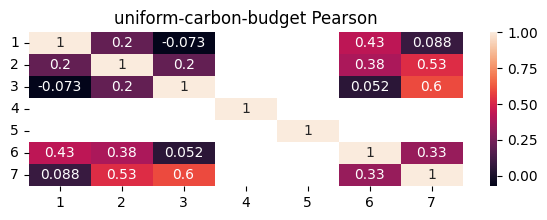

Hamming similarity:
Time list:  [0.89, 0.98, 0.94, 1.0, 1.0, 0.88, 0.96]
Time mean:  0.95
Spatial dict:  {'1-2': 0.7, '1-3': 0.4, '1-4': 0.27, '1-5': 0.27, '1-6': 0.79, '1-7': 0.53, '2-3': 0.5, '2-4': 0.23, '2-5': 0.23, '2-6': 0.79, '2-7': 0.71, '3-4': 0.65, '3-5': 0.65, '3-6': 0.43, '3-7': 0.79, '4-5': 1.0, '4-6': 0.2, '4-7': 0.52, '5-6': 0.2, '5-7': 0.52, '6-7': 0.62}
Spatial mean:  0.52
x --------------- x


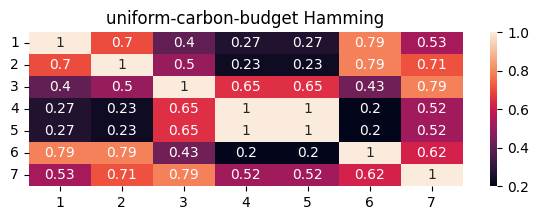

Mutual Information Score:
Time list:  [0.25, 0.45, 0.42, 0.0, 0.0, 0.17, 0.52]
Time mean:  0.26
Spatial dict:  {'1-2': 0.02, '1-3': 0.0, '1-4': 0.0, '1-5': 0.0, '1-6': 0.08, '1-7': 0.0, '2-3': 0.02, '2-4': 0.0, '2-5': 0.0, '2-6': 0.06, '2-7': 0.18, '3-4': 0.0, '3-5': 0.0, '3-6': 0.0, '3-7': 0.19, '4-5': 0.0, '4-6': 0.0, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.06}
Spatial mean:  0.03


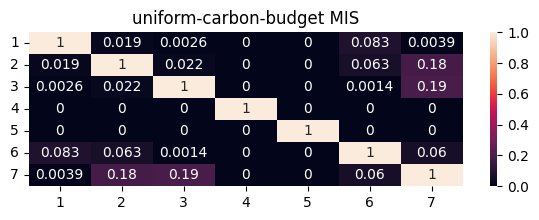

xxxxxxxxxxxxxxxxxxxxxxxxxxx


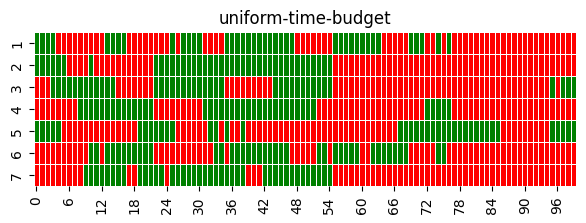

Markov Chains lambda 2:
Countries lambda_2:  [0.64, 0.89, 0.81, 0.87, 0.75, 0.66, 0.83]
Mean lambda_2:  0.78
x --------------- x
Peasron correlation:
Time list:  [0.64, 0.89, 0.81, 0.87, 0.75, 0.66, 0.83]
Time mean:  0.78
Spatial dict:  {'1-2': 0.25, '1-3': -0.17, '1-4': 0.13, '1-5': -0.17, '1-6': 0.29, '1-7': 0.13, '2-3': 0.5, '2-4': 0.25, '2-5': -0.12, '2-6': -0.0, '2-7': 0.58, '3-4': 0.13, '3-5': -0.17, '3-6': -0.21, '3-7': 0.54, '4-5': -0.17, '4-6': 0.42, '4-7': 0.54, '5-6': -0.29, '5-7': -0.25, '6-7': 0.21}
Spatial mean:  0.12
x --------------- x


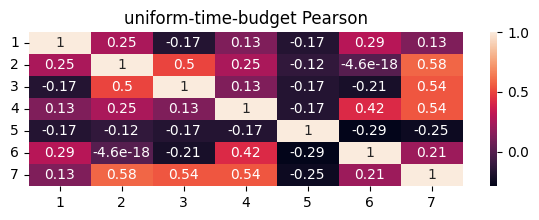

Hamming similarity:
Time list:  [0.83, 0.95, 0.91, 0.94, 0.88, 0.84, 0.92]
Time mean:  0.89
Spatial dict:  {'1-2': 0.64, '1-3': 0.44, '1-4': 0.58, '1-5': 0.44, '1-6': 0.66, '1-7': 0.58, '2-3': 0.76, '2-4': 0.64, '2-5': 0.46, '2-6': 0.52, '2-7': 0.8, '3-4': 0.58, '3-5': 0.44, '3-6': 0.42, '3-7': 0.78, '4-5': 0.44, '4-6': 0.72, '4-7': 0.78, '5-6': 0.38, '5-7': 0.4, '6-7': 0.62}
Spatial mean:  0.58
x --------------- x


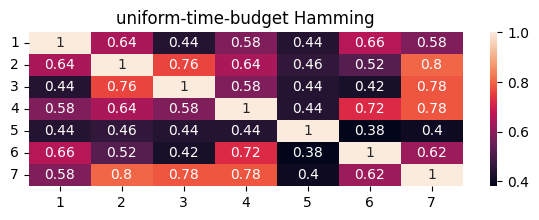

Mutual Information Score:
Time list:  [0.22, 0.47, 0.37, 0.45, 0.3, 0.24, 0.4]
Time mean:  0.35
Spatial dict:  {'1-2': 0.03, '1-3': 0.01, '1-4': 0.01, '1-5': 0.01, '1-6': 0.04, '1-7': 0.01, '2-3': 0.13, '2-4': 0.03, '2-5': 0.01, '2-6': 0.0, '2-7': 0.18, '3-4': 0.01, '3-5': 0.01, '3-6': 0.02, '3-7': 0.15, '4-5': 0.01, '4-6': 0.09, '4-7': 0.15, '5-6': 0.04, '5-7': 0.03, '6-7': 0.02}
Spatial mean:  0.05


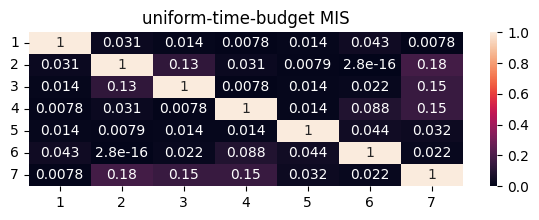

xxxxxxxxxxxxxxxxxxxxxxxxxxx


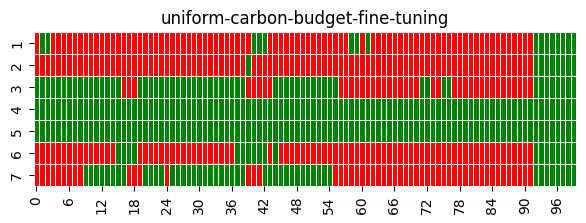

Markov Chains lambda 2:
Countries lambda_2:  [0.67, 0.85, 0.79, 1.0, 1.0, 0.78, 0.82]
Mean lambda_2:  0.85
x --------------- x
Peasron correlation:
Time list:  [0.66, 0.81, 0.79, 1.0, 1.0, 0.77, 0.82]
Time mean:  0.83
Spatial dict:  {'1-2': 0.63, '1-3': 0.02, '1-4': nan, '1-5': nan, '1-6': 0.55, '1-7': 0.08, '2-3': 0.19, '2-4': nan, '2-5': nan, '2-6': 0.65, '2-7': 0.26, '3-4': nan, '3-5': nan, '3-6': 0.03, '3-7': 0.65, '4-5': nan, '4-6': nan, '4-7': nan, '5-6': nan, '5-7': nan, '6-7': 0.26}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


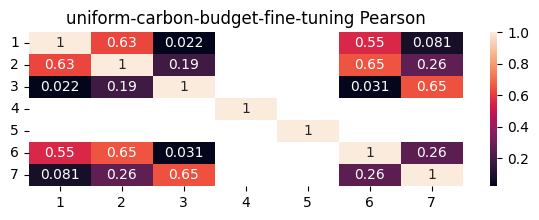

Hamming similarity:
Time list:  [0.91, 0.97, 0.9, 1.0, 1.0, 0.93, 0.91]
Time mean:  0.95
Spatial dict:  {'1-2': 0.91, '1-3': 0.44, '1-4': 0.16, '1-5': 0.16, '1-6': 0.87, '1-7': 0.55, '2-3': 0.47, '2-4': 0.09, '2-5': 0.09, '2-6': 0.9, '2-7': 0.6, '3-4': 0.6, '3-5': 0.6, '3-6': 0.45, '3-7': 0.81, '4-5': 1.0, '4-6': 0.19, '4-7': 0.47, '5-6': 0.19, '5-7': 0.47, '6-7': 0.62}
Spatial mean:  0.51
x --------------- x


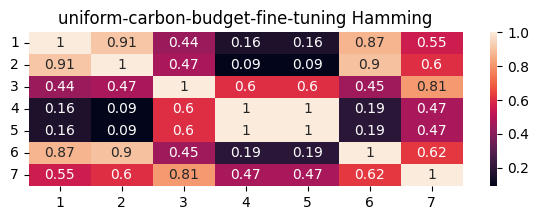

Mutual Information Score:
Time list:  [0.16, 0.18, 0.35, 0.0, 0.0, 0.25, 0.39]
Time mean:  0.19
Spatial dict:  {'1-2': 0.14, '1-3': 0.0, '1-4': 0.0, '1-5': 0.0, '1-6': 0.12, '1-7': 0.0, '2-3': 0.02, '2-4': 0.0, '2-5': 0.0, '2-6': 0.17, '2-7': 0.04, '3-4': 0.0, '3-5': 0.0, '3-6': 0.0, '3-7': 0.24, '4-5': 0.0, '4-6': 0.0, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.03}
Spatial mean:  0.04


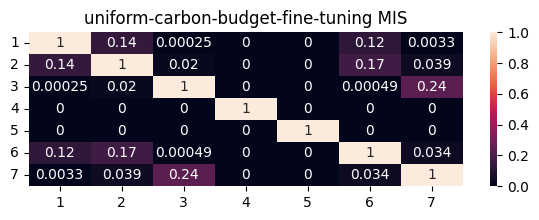

xxxxxxxxxxxxxxxxxxxxxxxxxxx


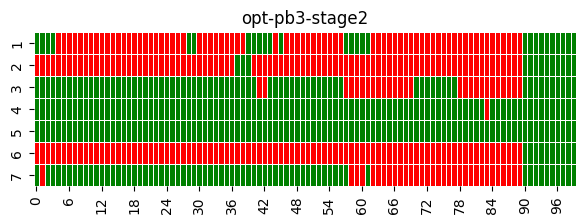

Markov Chains lambda 2:
Countries lambda_2:  [0.74, 0.89, 0.85, -0.01, 1.0, 0.99, 0.86]
Mean lambda_2:  0.76
x --------------- x
Peasron correlation:
Time list:  [0.74, 0.86, 0.85, -0.01, 1.0, 0.94, 0.86]
Time mean:  0.75
Spatial dict:  {'1-2': 0.5, '1-3': 0.01, '1-4': 0.06, '1-5': nan, '1-6': 0.55, '1-7': 0.22, '2-3': 0.24, '2-4': 0.04, '2-5': nan, '2-6': 0.86, '2-7': 0.27, '3-4': 0.17, '3-5': nan, '3-6': 0.2, '3-7': 0.69, '4-5': nan, '4-6': 0.03, '4-7': 0.15, '5-6': nan, '5-7': nan, '6-7': 0.23}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


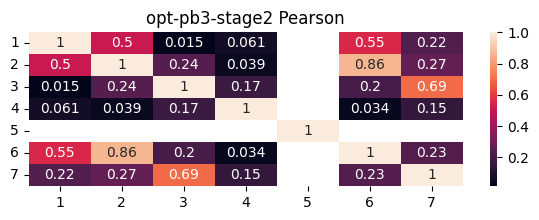

Hamming similarity:
Time list:  [0.9, 0.97, 0.94, 0.98, 1.0, 0.99, 0.94]
Time mean:  0.96
Spatial dict:  {'1-2': 0.82, '1-3': 0.4, '1-4': 0.28, '1-5': 0.27, '1-6': 0.83, '1-7': 0.51, '2-3': 0.4, '2-4': 0.14, '2-5': 0.13, '2-6': 0.97, '2-7': 0.45, '3-4': 0.74, '3-5': 0.73, '3-6': 0.37, '3-7': 0.87, '4-5': 0.99, '4-6': 0.11, '4-7': 0.69, '5-6': 0.1, '5-7': 0.68, '6-7': 0.42}
Spatial mean:  0.52
x --------------- x


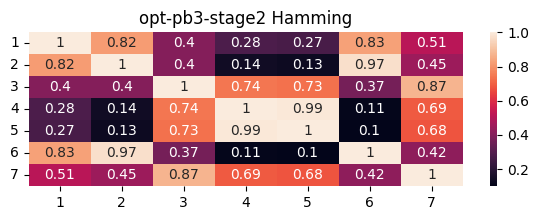

Mutual Information Score:
Time list:  [0.26, 0.26, 0.36, 0.0, 0.0, 0.27, 0.4]
Time mean:  0.22
Spatial dict:  {'1-2': 0.11, '1-3': 0.0, '1-4': 0.0, '1-5': 0.0, '1-6': 0.15, '1-7': 0.03, '2-3': 0.04, '2-4': 0.0, '2-5': 0.0, '2-6': 0.25, '2-7': 0.05, '3-4': 0.01, '3-5': 0.0, '3-6': 0.03, '3-7': 0.24, '4-5': 0.0, '4-6': 0.0, '4-7': 0.01, '5-6': 0.0, '5-7': 0.0, '6-7': 0.04}
Spatial mean:  0.05


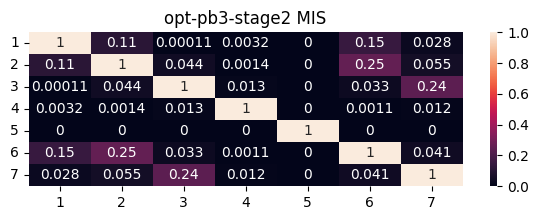

xxxxxxxxxxxxxxxxxxxxxxxxxxx


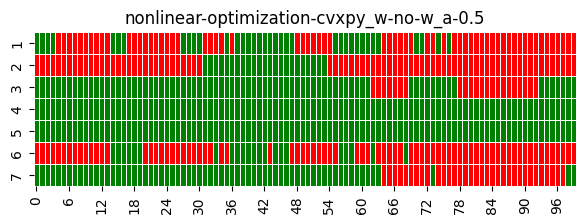

Markov Chains lambda 2:
Countries lambda_2:  [0.62, 0.94, 0.88, 1.0, 1.0, 0.59, 0.91]
Mean lambda_2:  0.85
x --------------- x
Peasron correlation:
Time list:  [0.63, 0.94, 0.88, 1.0, 1.0, 0.59, 0.91]
Time mean:  0.85
Spatial dict:  {'1-2': 0.18, '1-3': 0.3, '1-4': nan, '1-5': nan, '1-6': 0.41, '1-7': 0.35, '2-3': 0.29, '2-4': nan, '2-5': nan, '2-6': 0.34, '2-7': 0.38, '3-4': nan, '3-5': nan, '3-6': 0.17, '3-7': 0.65, '4-5': nan, '4-6': nan, '4-7': nan, '5-6': nan, '5-7': nan, '6-7': 0.32}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


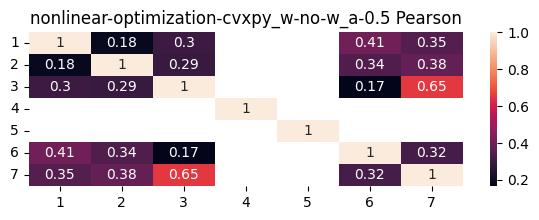

Hamming similarity:
Time list:  [0.83, 0.98, 0.96, 1.0, 1.0, 0.86, 0.96]
Time mean:  0.94
Spatial dict:  {'1-2': 0.65, '1-3': 0.54, '1-4': 0.36, '1-5': 0.36, '1-6': 0.74, '1-7': 0.61, '2-3': 0.45, '2-4': 0.23, '2-5': 0.23, '2-6': 0.77, '2-7': 0.56, '3-4': 0.78, '3-5': 0.78, '3-6': 0.4, '3-7': 0.85, '4-5': 1.0, '4-6': 0.22, '4-7': 0.67, '5-6': 0.22, '5-7': 0.67, '6-7': 0.53}
Spatial mean:  0.55
x --------------- x


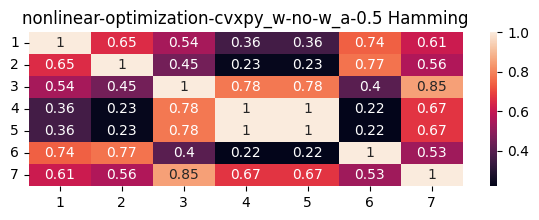

Mutual Information Score:
Time list:  [0.2, 0.45, 0.37, 0.0, 0.0, 0.15, 0.47]
Time mean:  0.23
Spatial dict:  {'1-2': 0.02, '1-3': 0.05, '1-4': 0.0, '1-5': 0.0, '1-6': 0.08, '1-7': 0.07, '2-3': 0.07, '2-4': 0.0, '2-5': 0.0, '2-6': 0.05, '2-7': 0.11, '3-4': 0.0, '3-5': 0.0, '3-6': 0.02, '3-7': 0.22, '4-5': 0.0, '4-6': 0.0, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.07}
Spatial mean:  0.04


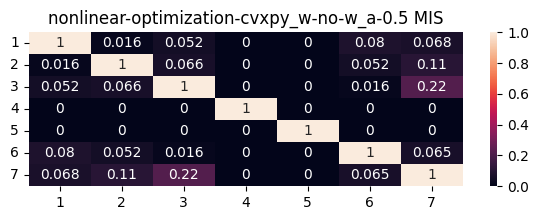

xxxxxxxxxxxxxxxxxxxxxxxxxxx


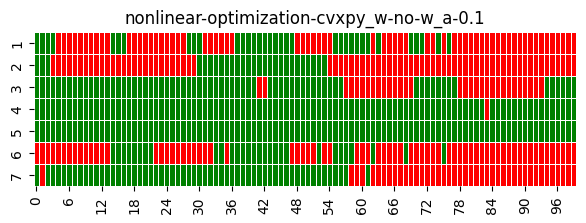

Markov Chains lambda 2:
Countries lambda_2:  [0.61, 0.91, 0.86, -0.01, 1.0, 0.61, 0.9]
Mean lambda_2:  0.7
x --------------- x
Peasron correlation:
Time list:  [0.62, 0.92, 0.86, -0.01, 1.0, 0.61, 0.9]
Time mean:  0.7
Spatial dict:  {'1-2': 0.28, '1-3': 0.07, '1-4': 0.07, '1-5': nan, '1-6': 0.33, '1-7': 0.18, '2-3': 0.31, '2-4': 0.06, '2-5': nan, '2-6': 0.31, '2-7': 0.47, '3-4': 0.15, '3-5': nan, '3-6': 0.14, '3-7': 0.61, '4-5': nan, '4-6': 0.06, '4-7': 0.12, '5-6': nan, '5-7': nan, '6-7': 0.37}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


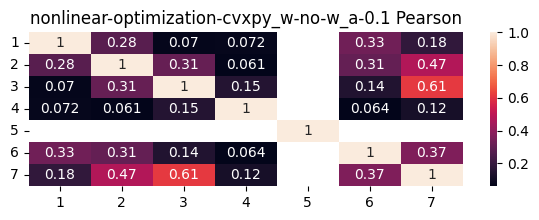

Hamming similarity:
Time list:  [0.83, 0.97, 0.94, 0.98, 1.0, 0.84, 0.95]
Time mean:  0.93
Spatial dict:  {'1-2': 0.69, '1-3': 0.47, '1-4': 0.35, '1-5': 0.34, '1-6': 0.71, '1-7': 0.56, '2-3': 0.54, '2-4': 0.28, '2-5': 0.27, '2-6': 0.72, '2-7': 0.67, '3-4': 0.7, '3-5': 0.69, '3-6': 0.48, '3-7': 0.81, '4-5': 0.99, '4-6': 0.3, '4-7': 0.59, '5-6': 0.29, '5-7': 0.58, '6-7': 0.63}
Spatial mean:  0.56
x --------------- x


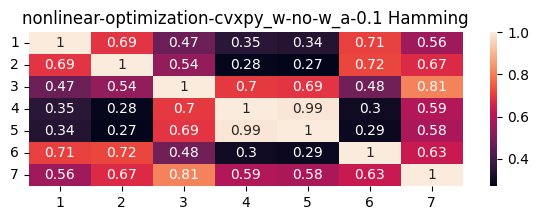

Mutual Information Score:
Time list:  [0.19, 0.45, 0.4, 0.0, 0.0, 0.18, 0.48]
Time mean:  0.24
Spatial dict:  {'1-2': 0.04, '1-3': 0.0, '1-4': 0.0, '1-5': 0.0, '1-6': 0.05, '1-7': 0.02, '2-3': 0.06, '2-4': 0.0, '2-5': 0.0, '2-6': 0.04, '2-7': 0.14, '3-4': 0.01, '3-5': 0.0, '3-6': 0.01, '3-7': 0.2, '4-5': 0.0, '4-6': 0.0, '4-7': 0.01, '5-6': 0.0, '5-7': 0.0, '6-7': 0.07}
Spatial mean:  0.03


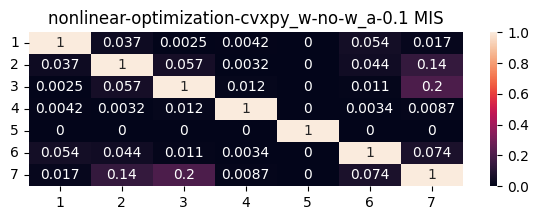

xxxxxxxxxxxxxxxxxxxxxxxxxxx


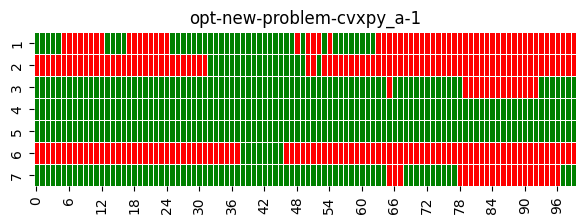

Markov Chains lambda 2:
Countries lambda_2:  [0.77, 0.87, 0.84, 1.0, 1.0, 0.86, 0.88]
Mean lambda_2:  0.89
x --------------- x
Peasron correlation:
Time list:  [0.77, 0.87, 0.84, 1.0, 1.0, 0.86, 0.88]
Time mean:  0.89
Spatial dict:  {'1-2': 0.47, '1-3': 0.36, '1-4': nan, '1-5': nan, '1-6': 0.35, '1-7': 0.45, '2-3': 0.2, '2-4': nan, '2-5': nan, '2-6': 0.61, '2-7': 0.26, '3-4': nan, '3-5': nan, '3-6': 0.12, '3-7': 0.79, '4-5': nan, '4-6': nan, '4-7': nan, '5-6': nan, '5-7': nan, '6-7': 0.16}
Spatial mean:  nan
x --------------- x


/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/charlotterodriguez/Desktop/Code/GitHub/venv_greenFL_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


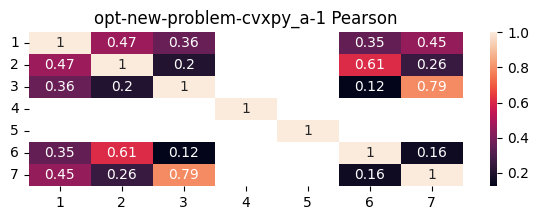

Hamming similarity:
Time list:  [0.89, 0.96, 0.96, 1.0, 1.0, 0.98, 0.96]
Time mean:  0.96
Spatial dict:  {'1-2': 0.73, '1-3': 0.57, '1-4': 0.42, '1-5': 0.42, '1-6': 0.66, '1-7': 0.64, '2-3': 0.34, '2-4': 0.19, '2-5': 0.19, '2-6': 0.89, '2-7': 0.41, '3-4': 0.85, '3-5': 0.85, '3-6': 0.23, '3-7': 0.93, '4-5': 1.0, '4-6': 0.08, '4-7': 0.78, '5-6': 0.08, '5-7': 0.78, '6-7': 0.3}
Spatial mean:  0.54
x --------------- x


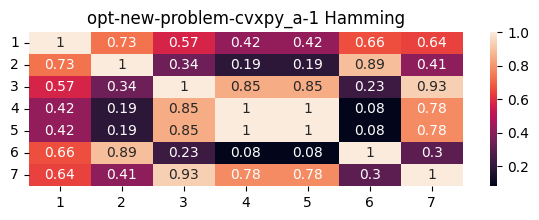

Mutual Information Score:
Time list:  [0.33, 0.33, 0.27, 0.0, 0.0, 0.19, 0.37]
Time mean:  0.21
Spatial dict:  {'1-2': 0.12, '1-3': 0.09, '1-4': 0.0, '1-5': 0.0, '1-6': 0.07, '1-7': 0.14, '2-3': 0.03, '2-4': 0.0, '2-5': 0.0, '2-6': 0.15, '2-7': 0.05, '3-4': 0.0, '3-5': 0.0, '3-6': 0.01, '3-7': 0.29, '4-5': 0.0, '4-6': 0.0, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.02}
Spatial mean:  0.05


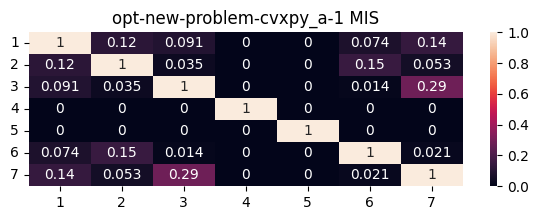

xxxxxxxxxxxxxxxxxxxxxxxxxxx


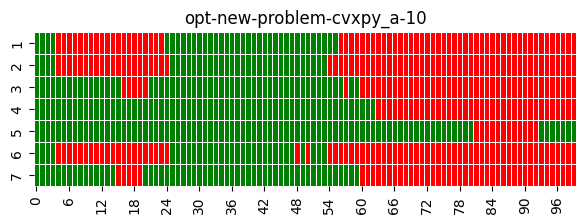

Markov Chains lambda 2:
Countries lambda_2:  [0.93, 0.92, 0.9, 0.98, 0.91, 0.83, 0.94]
Mean lambda_2:  0.92
x --------------- x
Peasron correlation:
Time list:  [0.93, 0.93, 0.9, 0.98, 0.91, 0.83, 0.94]
Time mean:  0.92
Spatial dict:  {'1-2': 0.94, '1-3': 0.69, '1-4': 0.57, '1-5': 0.28, '1-6': 0.89, '1-7': 0.68, '2-3': 0.65, '2-4': 0.54, '2-5': 0.26, '2-6': 0.96, '2-7': 0.63, '3-4': 0.83, '3-5': 0.4, '3-6': 0.62, '3-7': 0.94, '4-5': 0.48, '4-6': 0.51, '4-7': 0.85, '5-6': 0.25, '5-7': 0.41, '6-7': 0.61}
Spatial mean:  0.62
x --------------- x


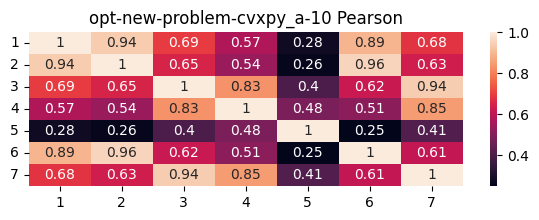

Hamming similarity:
Time list:  [0.97, 0.97, 0.95, 0.99, 0.98, 0.93, 0.97]
Time mean:  0.97
Spatial dict:  {'1-2': 0.97, '1-3': 0.82, '1-4': 0.73, '1-5': 0.48, '1-6': 0.95, '1-7': 0.81, '2-3': 0.79, '2-4': 0.7, '2-5': 0.45, '2-6': 0.98, '2-7': 0.78, '3-4': 0.91, '3-5': 0.66, '3-6': 0.77, '3-7': 0.97, '4-5': 0.75, '4-6': 0.68, '4-7': 0.92, '5-6': 0.43, '5-7': 0.67, '6-7': 0.76}
Spatial mean:  0.76
x --------------- x


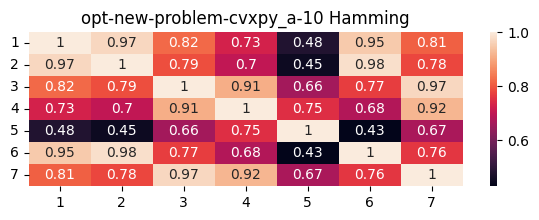

Mutual Information Score:
Time list:  [0.52, 0.5, 0.49, 0.61, 0.28, 0.37, 0.55]
Time mean:  0.47
Spatial dict:  {'1-2': 0.53, '1-3': 0.31, '1-4': 0.22, '1-5': 0.06, '1-6': 0.47, '1-7': 0.3, '2-3': 0.27, '2-4': 0.2, '2-5': 0.05, '2-6': 0.54, '2-7': 0.26, '3-4': 0.43, '3-5': 0.1, '3-6': 0.25, '3-7': 0.56, '4-5': 0.13, '4-6': 0.18, '4-7': 0.45, '5-6': 0.05, '5-7': 0.11, '6-7': 0.24}
Spatial mean:  0.27


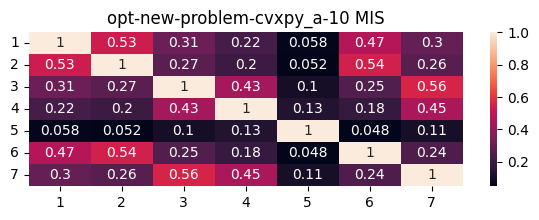

xxxxxxxxxxxxxxxxxxxxxxxxxxx


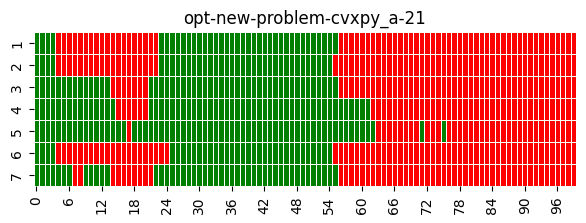

Markov Chains lambda 2:
Countries lambda_2:  [0.93, 0.93, 0.94, 0.94, 0.85, 0.93, 0.9]
Mean lambda_2:  0.92
x --------------- x
Peasron correlation:
Time list:  [0.94, 0.93, 0.94, 0.94, 0.85, 0.93, 0.9]
Time mean:  0.92
Spatial dict:  {'1-2': 0.98, '1-3': 0.78, '1-4': 0.68, '1-5': 0.57, '1-6': 0.94, '1-7': 0.83, '2-3': 0.77, '2-4': 0.66, '2-5': 0.56, '2-6': 0.96, '2-7': 0.81, '3-4': 0.87, '3-5': 0.74, '3-6': 0.73, '3-7': 0.94, '4-5': 0.85, '4-6': 0.64, '4-7': 0.82, '5-6': 0.54, '5-7': 0.69, '6-7': 0.78}
Spatial mean:  0.77
x --------------- x


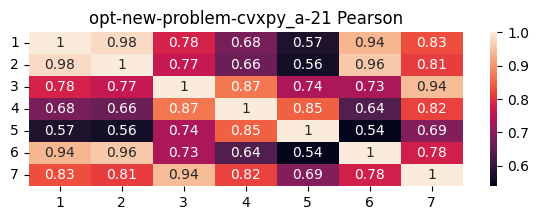

Hamming similarity:
Time list:  [0.97, 0.97, 0.97, 0.97, 0.93, 0.97, 0.95]
Time mean:  0.96
Spatial dict:  {'1-2': 0.99, '1-3': 0.88, '1-4': 0.81, '1-5': 0.73, '1-6': 0.97, '1-7': 0.91, '2-3': 0.87, '2-4': 0.8, '2-5': 0.72, '2-6': 0.98, '2-7': 0.9, '3-4': 0.93, '3-5': 0.85, '3-6': 0.85, '3-7': 0.97, '4-5': 0.92, '4-6': 0.78, '4-7': 0.9, '5-6': 0.7, '5-7': 0.82, '6-7': 0.88}
Spatial mean:  0.86
x --------------- x


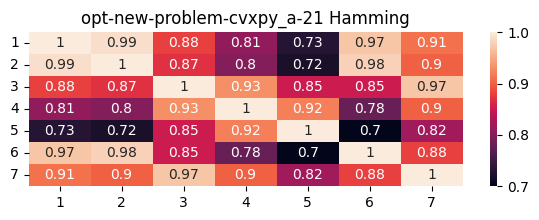

Mutual Information Score:
Time list:  [0.53, 0.52, 0.56, 0.55, 0.4, 0.51, 0.49]
Time mean:  0.51
Spatial dict:  {'1-2': 0.61, '1-3': 0.39, '1-4': 0.3, '1-5': 0.22, '1-6': 0.54, '1-7': 0.43, '2-3': 0.37, '2-4': 0.29, '2-5': 0.21, '2-6': 0.56, '2-7': 0.41, '3-4': 0.48, '3-5': 0.34, '3-6': 0.34, '3-7': 0.58, '4-5': 0.44, '4-6': 0.27, '4-7': 0.43, '5-6': 0.2, '5-7': 0.31, '6-7': 0.38}
Spatial mean:  0.39


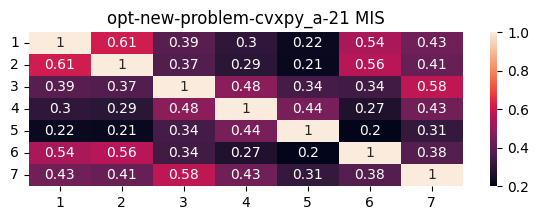

xxxxxxxxxxxxxxxxxxxxxxxxxxx


In [50]:
av_mat_list = ['uniform-CI-threshold', 'uniform-carbon-budget', 'uniform-time-budget', 'uniform-carbon-budget-fine-tuning',
               'opt-pb3-stage2', 'nonlinear-optimization-cvxpy_w-no-w_a-0.5', 'nonlinear-optimization-cvxpy_w-no-w_a-0.1',
               'opt-new-problem-cvxpy_a-1', 'opt-new-problem-cvxpy_a-10', 'opt-new-problem-cvxpy_a-21']
# av_mat_name = 'uniform-CI-threshold'
folder=main_folder+'/up_to_24-09-2024'
for av_mat_name in av_mat_list:
    correlation_analysis(av_mat_name, folder)

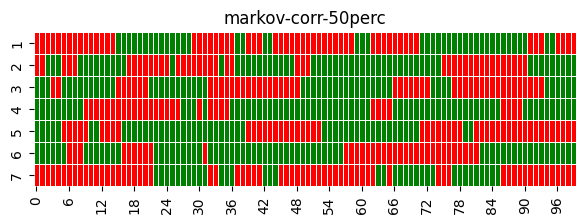

Markov Chains lambda 2:
Countries lambda_2:  [0.75, 0.73, 0.8, 0.77, 0.82, 0.82, 0.73]
Mean lambda_2:  0.77
x --------------- x
Peasron correlation:
Time list:  [0.75, 0.73, 0.8, 0.77, 0.82, 0.82, 0.73]
Time mean:  0.77
Spatial dict:  {'1-2': -0.37, '1-3': -0.2, '1-4': -0.12, '1-5': -0.06, '1-6': -0.21, '1-7': 0.25, '2-3': 0.1, '2-4': 0.17, '2-5': -0.04, '2-6': 0.01, '2-7': -0.23, '3-4': -0.05, '3-5': 0.14, '3-6': -0.01, '3-7': -0.2, '4-5': -0.28, '4-6': -0.04, '4-7': 0.04, '5-6': -0.23, '5-7': 0.19, '6-7': -0.16}
Spatial mean:  -0.06
x --------------- x


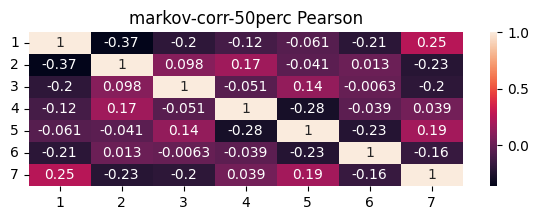

Hamming similarity:
Time list:  [0.88, 0.87, 0.9, 0.9, 0.91, 0.92, 0.88]
Time mean:  0.89
Spatial dict:  {'1-2': 0.31, '1-3': 0.4, '1-4': 0.42, '1-5': 0.47, '1-6': 0.38, '1-7': 0.64, '2-3': 0.55, '2-4': 0.61, '2-5': 0.48, '2-6': 0.53, '2-7': 0.37, '3-4': 0.48, '3-5': 0.57, '3-6': 0.5, '3-7': 0.4, '4-5': 0.37, '4-6': 0.54, '4-7': 0.46, '5-6': 0.39, '5-7': 0.59, '6-7': 0.38}
Spatial mean:  0.47
x --------------- x


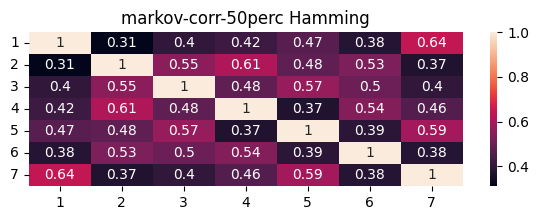

Mutual Information Score:
Time list:  [0.32, 0.29, 0.37, 0.3, 0.39, 0.37, 0.29]
Time mean:  0.33
Spatial dict:  {'1-2': 0.07, '1-3': 0.02, '1-4': 0.01, '1-5': 0.0, '1-6': 0.02, '1-7': 0.03, '2-3': 0.0, '2-4': 0.02, '2-5': 0.0, '2-6': 0.0, '2-7': 0.03, '3-4': 0.0, '3-5': 0.01, '3-6': 0.0, '3-7': 0.02, '4-5': 0.04, '4-6': 0.0, '4-7': 0.0, '5-6': 0.03, '5-7': 0.02, '6-7': 0.01}
Spatial mean:  0.02


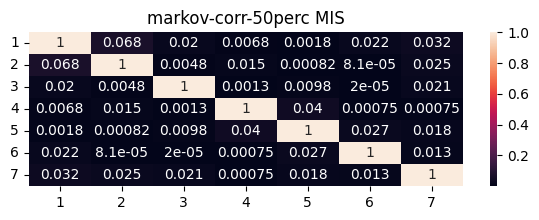

xxxxxxxxxxxxxxxxxxxxxxxxxxx


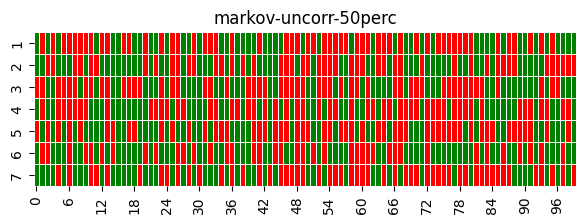

Markov Chains lambda 2:
Countries lambda_2:  [-0.06, 0.09, 0.17, 0.03, -0.04, -0.1, -0.11]
Mean lambda_2:  -0.0
x --------------- x
Peasron correlation:
Time list:  [-0.06, 0.09, 0.17, 0.03, -0.04, -0.1, -0.12]
Time mean:  -0.0
Spatial dict:  {'1-2': 0.07, '1-3': 0.26, '1-4': 0.06, '1-5': 0.03, '1-6': 0.04, '1-7': -0.02, '2-3': -0.12, '2-4': -0.2, '2-5': 0.02, '2-6': 0.03, '2-7': 0.04, '3-4': 0.08, '3-5': 0.02, '3-6': 0.01, '3-7': 0.12, '4-5': 0.06, '4-6': 0.05, '4-7': -0.0, '5-6': -0.08, '5-7': -0.02, '6-7': -0.07}
Spatial mean:  0.02
x --------------- x


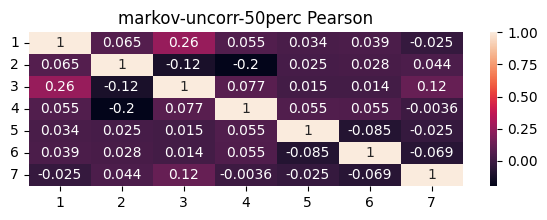

Hamming similarity:
Time list:  [0.47, 0.55, 0.59, 0.52, 0.48, 0.47, 0.44]
Time mean:  0.5
Spatial dict:  {'1-2': 0.53, '1-3': 0.63, '1-4': 0.53, '1-5': 0.52, '1-6': 0.51, '1-7': 0.49, '2-3': 0.44, '2-4': 0.4, '2-5': 0.51, '2-6': 0.52, '2-7': 0.52, '3-4': 0.54, '3-5': 0.51, '3-6': 0.5, '3-7': 0.56, '4-5': 0.53, '4-6': 0.52, '4-7': 0.5, '5-6': 0.45, '5-7': 0.49, '6-7': 0.46}
Spatial mean:  0.51
x --------------- x


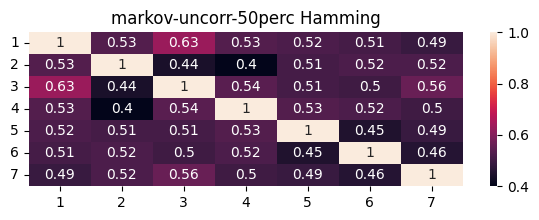

Mutual Information Score:
Time list:  [0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.01]
Time mean:  0.0
Spatial dict:  {'1-2': 0.0, '1-3': 0.03, '1-4': 0.0, '1-5': 0.0, '1-6': 0.0, '1-7': 0.0, '2-3': 0.01, '2-4': 0.02, '2-5': 0.0, '2-6': 0.0, '2-7': 0.0, '3-4': 0.0, '3-5': 0.0, '3-6': 0.0, '3-7': 0.01, '4-5': 0.0, '4-6': 0.0, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.0}
Spatial mean:  0.0


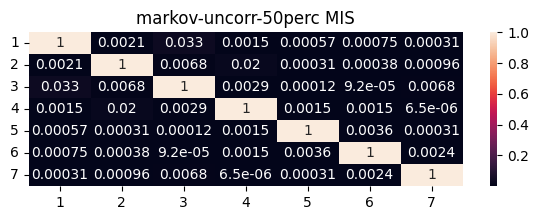

xxxxxxxxxxxxxxxxxxxxxxxxxxx


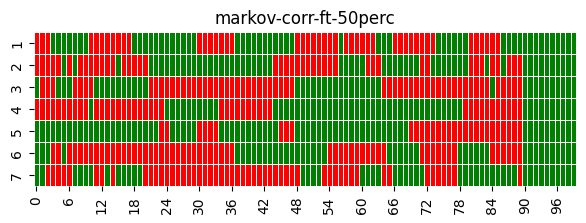

Markov Chains lambda 2:
Countries lambda_2:  [0.73, 0.61, 0.79, 0.85, 0.81, 0.79, 0.68]
Mean lambda_2:  0.75
x --------------- x
Peasron correlation:
Time list:  [0.74, 0.61, 0.79, 0.86, 0.81, 0.79, 0.68]
Time mean:  0.75
Spatial dict:  {'1-2': 0.29, '1-3': -0.17, '1-4': -0.05, '1-5': 0.05, '1-6': 0.07, '1-7': -0.18, '2-3': -0.26, '2-4': 0.25, '2-5': 0.0, '2-6': 0.1, '2-7': -0.19, '3-4': 0.12, '3-5': 0.5, '3-6': 0.02, '3-7': 0.27, '4-5': -0.05, '4-6': 0.12, '4-7': -0.01, '5-6': 0.08, '5-7': 0.0, '6-7': 0.27}
Spatial mean:  0.06
x --------------- x


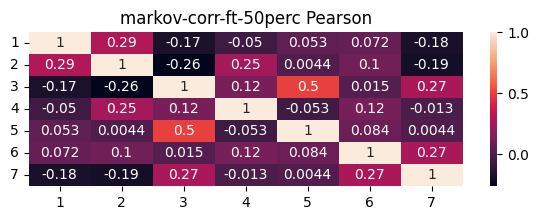

Hamming similarity:
Time list:  [0.87, 0.81, 0.9, 0.93, 0.92, 0.9, 0.84]
Time mean:  0.88
Spatial dict:  {'1-2': 0.65, '1-3': 0.41, '1-4': 0.48, '1-5': 0.54, '1-6': 0.53, '1-7': 0.41, '2-3': 0.36, '2-4': 0.63, '2-5': 0.53, '2-6': 0.54, '2-7': 0.4, '3-4': 0.55, '3-5': 0.69, '3-6': 0.52, '3-7': 0.64, '4-5': 0.5, '4-6': 0.55, '4-7': 0.49, '5-6': 0.51, '5-7': 0.49, '6-7': 0.64}
Spatial mean:  0.53
x --------------- x


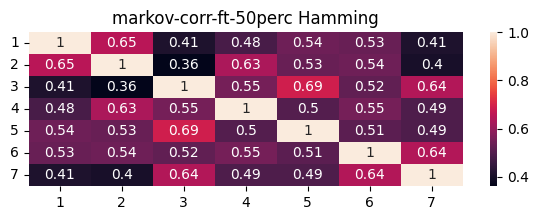

Mutual Information Score:
Time list:  [0.3, 0.2, 0.35, 0.43, 0.34, 0.36, 0.25]
Time mean:  0.32
Spatial dict:  {'1-2': 0.04, '1-3': 0.01, '1-4': 0.0, '1-5': 0.0, '1-6': 0.0, '1-7': 0.02, '2-3': 0.03, '2-4': 0.03, '2-5': 0.0, '2-6': 0.01, '2-7': 0.02, '3-4': 0.01, '3-5': 0.15, '3-6': 0.0, '3-7': 0.04, '4-5': 0.0, '4-6': 0.01, '4-7': 0.0, '5-6': 0.0, '5-7': 0.0, '6-7': 0.04}
Spatial mean:  0.02


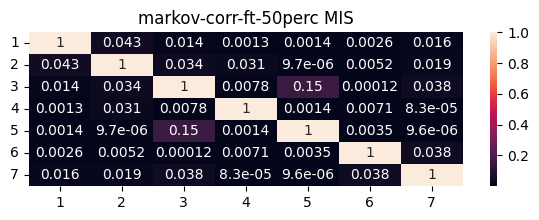

xxxxxxxxxxxxxxxxxxxxxxxxxxx


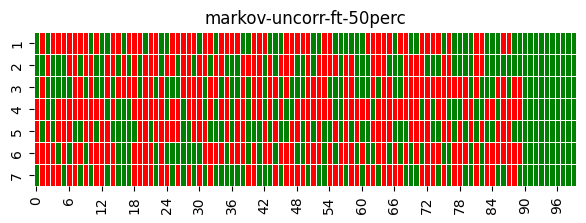

Markov Chains lambda 2:
Countries lambda_2:  [0.27, 0.15, 0.11, 0.15, 0.01, 0.07, -0.01]
Mean lambda_2:  0.11
x --------------- x
Peasron correlation:
Time list:  [0.27, 0.15, 0.11, 0.15, 0.01, 0.07, -0.01]
Time mean:  0.11
Spatial dict:  {'1-2': 0.11, '1-3': 0.04, '1-4': 0.19, '1-5': 0.04, '1-6': -0.01, '1-7': 0.14, '2-3': 0.26, '2-4': 0.04, '2-5': 0.18, '2-6': 0.03, '2-7': 0.0, '3-4': 0.12, '3-5': 0.0, '3-6': 0.2, '3-7': -0.02, '4-5': 0.14, '4-6': 0.25, '4-7': 0.14, '5-6': -0.07, '5-7': 0.02, '6-7': 0.1}
Spatial mean:  0.09
x --------------- x


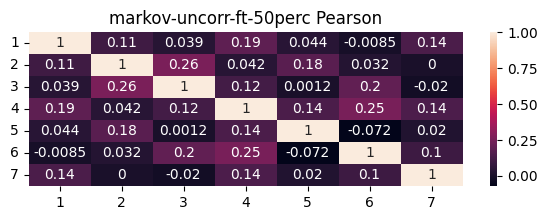

Hamming similarity:
Time list:  [0.64, 0.58, 0.56, 0.61, 0.51, 0.55, 0.49]
Time mean:  0.56
Spatial dict:  {'1-2': 0.55, '1-3': 0.52, '1-4': 0.6, '1-5': 0.52, '1-6': 0.5, '1-7': 0.57, '2-3': 0.63, '2-4': 0.51, '2-5': 0.59, '2-6': 0.51, '2-7': 0.5, '3-4': 0.56, '3-5': 0.5, '3-6': 0.6, '3-7': 0.49, '4-5': 0.56, '4-6': 0.64, '4-7': 0.57, '5-6': 0.46, '5-7': 0.51, '6-7': 0.55}
Spatial mean:  0.54
x --------------- x


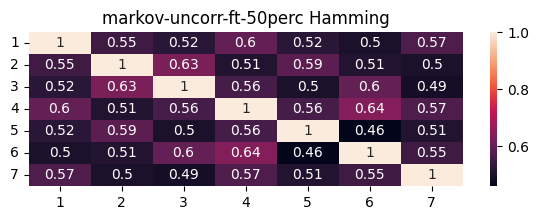

Mutual Information Score:
Time list:  [0.04, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0]
Time mean:  0.01
Spatial dict:  {'1-2': 0.01, '1-3': 0.0, '1-4': 0.02, '1-5': 0.0, '1-6': 0.0, '1-7': 0.01, '2-3': 0.03, '2-4': 0.0, '2-5': 0.02, '2-6': 0.0, '2-7': 0.0, '3-4': 0.01, '3-5': 0.0, '3-6': 0.02, '3-7': 0.0, '4-5': 0.01, '4-6': 0.03, '4-7': 0.01, '5-6': 0.0, '5-7': 0.0, '6-7': 0.01}
Spatial mean:  0.01


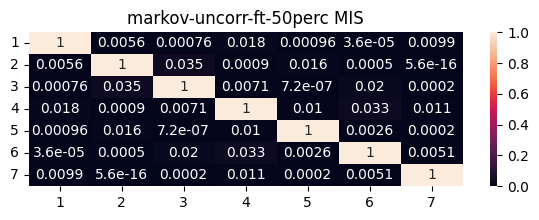

xxxxxxxxxxxxxxxxxxxxxxxxxxx


In [51]:
av_mat_list = ['markov-corr', 'markov-uncorr', 'markov-corr-ft', 'markov-uncorr-ft']
# av_mat_name = 'uniform-CI-threshold'
folder=main_folder
for av_mat_name in av_mat_list:
    av_mat_name+='-50perc'
    correlation_analysis(av_mat_name, folder)

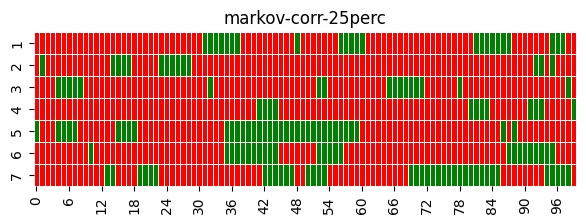

Markov Chains lambda 2:
Countries lambda_2:  [0.72, 0.58, 0.57, 0.68, 0.75, 0.79, 0.74]
Mean lambda_2:  0.69
x --------------- x
Peasron correlation:
Time list:  [0.72, 0.58, 0.57, 0.66, 0.76, 0.79, 0.74]
Time mean:  0.69
Spatial dict:  {'1-2': -0.15, '1-3': -0.18, '1-4': 0.02, '1-5': 0.04, '1-6': 0.01, '1-7': -0.04, '2-3': -0.18, '2-4': 0.03, '2-5': -0.12, '2-6': -0.03, '2-7': -0.2, '3-4': -0.17, '3-5': -0.01, '3-6': -0.14, '3-7': 0.03, '4-5': -0.02, '4-6': 0.28, '4-7': 0.15, '5-6': 0.34, '5-7': -0.16, '6-7': -0.12}
Spatial mean:  -0.03
x --------------- x


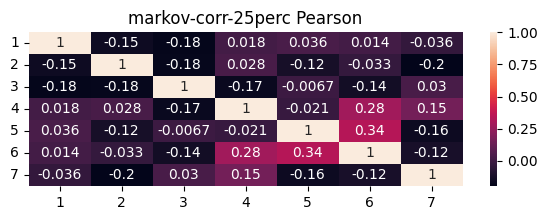

Hamming similarity:
Time list:  [0.9, 0.9, 0.88, 0.93, 0.89, 0.92, 0.88]
Time mean:  0.9
Spatial dict:  {'1-2': 0.65, '1-3': 0.62, '1-4': 0.71, '1-5': 0.59, '1-6': 0.64, '1-7': 0.55, '2-3': 0.69, '2-4': 0.78, '2-5': 0.56, '2-6': 0.67, '2-7': 0.52, '3-4': 0.71, '3-5': 0.59, '3-6': 0.62, '3-7': 0.59, '4-5': 0.6, '4-6': 0.77, '4-7': 0.64, '5-6': 0.71, '5-7': 0.46, '6-7': 0.51}
Spatial mean:  0.63
x --------------- x


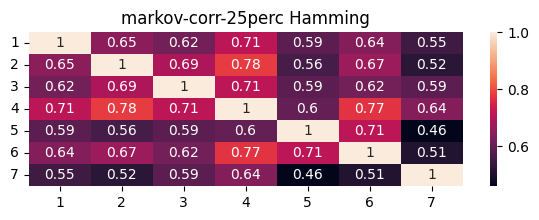

Mutual Information Score:
Time list:  [0.23, 0.12, 0.13, 0.14, 0.31, 0.3, 0.3]
Time mean:  0.22
Spatial dict:  {'1-2': 0.01, '1-3': 0.02, '1-4': 0.0, '1-5': 0.0, '1-6': 0.0, '1-7': 0.0, '2-3': 0.03, '2-4': 0.0, '2-5': 0.01, '2-6': 0.0, '2-7': 0.02, '3-4': 0.02, '3-5': 0.0, '3-6': 0.01, '3-7': 0.0, '4-5': 0.0, '4-6': 0.03, '4-7': 0.01, '5-6': 0.06, '5-7': 0.01, '6-7': 0.01}
Spatial mean:  0.01


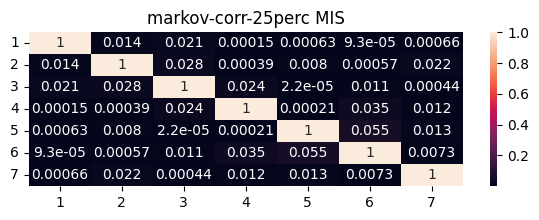

xxxxxxxxxxxxxxxxxxxxxxxxxxx


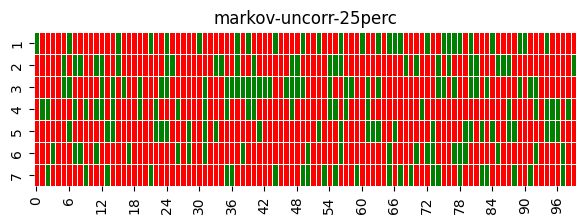

Markov Chains lambda 2:
Countries lambda_2:  [-0.06, 0.15, 0.17, -0.04, 0.11, -0.03, -0.08]
Mean lambda_2:  0.03
x --------------- x
Peasron correlation:
Time list:  [-0.06, 0.15, 0.17, -0.04, 0.11, -0.03, -0.08]
Time mean:  0.03
Spatial dict:  {'1-2': -0.07, '1-3': 0.01, '1-4': -0.26, '1-5': 0.1, '1-6': -0.04, '1-7': -0.01, '2-3': 0.06, '2-4': 0.05, '2-5': -0.1, '2-6': 0.02, '2-7': -0.23, '3-4': 0.13, '3-5': -0.02, '3-6': -0.18, '3-7': -0.11, '4-5': 0.06, '4-6': -0.03, '4-7': -0.11, '5-6': -0.03, '5-7': -0.11, '6-7': 0.01}
Spatial mean:  -0.04
x --------------- x


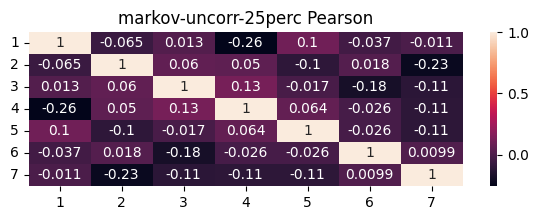

Hamming similarity:
Time list:  [0.59, 0.67, 0.62, 0.6, 0.66, 0.66, 0.62]
Time mean:  0.63
Spatial dict:  {'1-2': 0.58, '1-3': 0.57, '1-4': 0.51, '1-5': 0.65, '1-6': 0.62, '1-7': 0.62, '2-3': 0.59, '2-4': 0.63, '2-5': 0.57, '2-6': 0.64, '2-7': 0.54, '3-4': 0.62, '3-5': 0.56, '3-6': 0.51, '3-7': 0.53, '4-5': 0.64, '4-6': 0.63, '4-7': 0.59, '5-6': 0.63, '5-7': 0.59, '6-7': 0.66}
Spatial mean:  0.59
x --------------- x


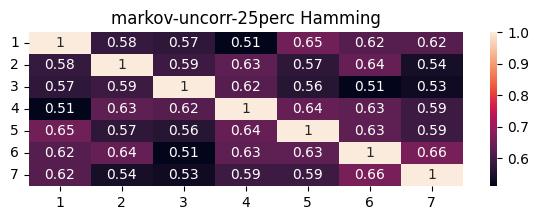

Mutual Information Score:
Time list:  [0.0, 0.01, 0.01, 0.0, 0.01, 0.0, 0.0]
Time mean:  0.01
Spatial dict:  {'1-2': 0.0, '1-3': 0.0, '1-4': 0.04, '1-5': 0.01, '1-6': 0.0, '1-7': 0.0, '2-3': 0.0, '2-4': 0.0, '2-5': 0.01, '2-6': 0.0, '2-7': 0.03, '3-4': 0.01, '3-5': 0.0, '3-6': 0.02, '3-7': 0.01, '4-5': 0.0, '4-6': 0.0, '4-7': 0.01, '5-6': 0.0, '5-7': 0.01, '6-7': 0.0}
Spatial mean:  0.01


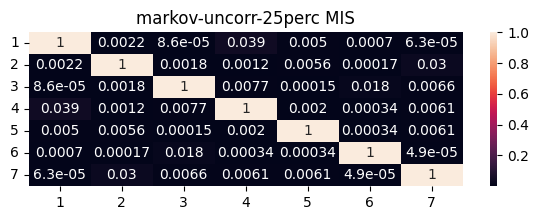

xxxxxxxxxxxxxxxxxxxxxxxxxxx


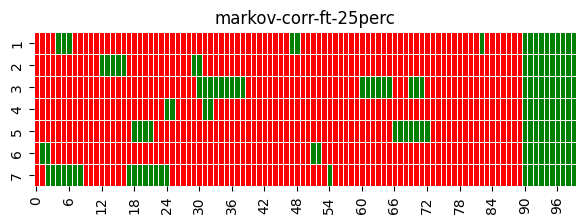

Markov Chains lambda 2:
Countries lambda_2:  [0.75, 0.84, 0.83, 0.81, 0.86, 0.81, 0.83]
Mean lambda_2:  0.82
x --------------- x
Peasron correlation:
Time list:  [0.73, 0.82, 0.82, 0.79, 0.85, 0.79, 0.82]
Time mean:  0.8
Spatial dict:  {'1-2': 0.53, '1-3': 0.34, '1-4': 0.61, '1-5': 0.44, '1-6': 0.61, '1-7': 0.55, '2-3': 0.37, '2-4': 0.58, '2-5': 0.42, '2-6': 0.58, '2-7': 0.34, '3-4': 0.52, '3-5': 0.39, '3-6': 0.39, '3-7': 0.14, '4-5': 0.5, '4-6': 0.67, '4-7': 0.48, '5-6': 0.5, '5-7': 0.48, '6-7': 0.48}
Spatial mean:  0.47
x --------------- x


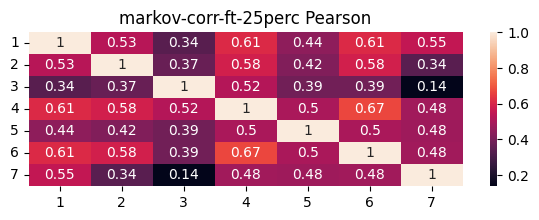

Hamming similarity:
Time list:  [0.93, 0.95, 0.93, 0.95, 0.95, 0.95, 0.93]
Time mean:  0.94
Spatial dict:  {'1-2': 0.87, '1-3': 0.76, '1-4': 0.9, '1-5': 0.83, '1-6': 0.9, '1-7': 0.84, '2-3': 0.77, '2-4': 0.89, '2-5': 0.82, '2-6': 0.89, '2-7': 0.77, '3-4': 0.82, '3-5': 0.77, '3-6': 0.78, '3-7': 0.66, '4-5': 0.85, '4-6': 0.92, '4-7': 0.82, '5-6': 0.85, '5-7': 0.81, '6-7': 0.82}
Spatial mean:  0.83
x --------------- x


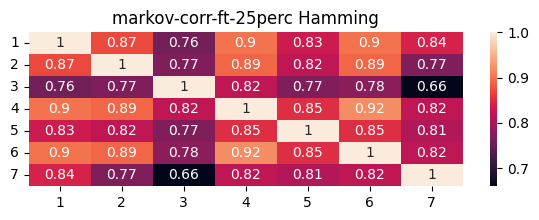

Mutual Information Score:
Time list:  [0.2, 0.27, 0.34, 0.22, 0.32, 0.22, 0.33]
Time mean:  0.27
Spatial dict:  {'1-2': 0.11, '1-3': 0.05, '1-4': 0.14, '1-5': 0.08, '1-6': 0.14, '1-7': 0.13, '2-3': 0.06, '2-4': 0.13, '2-5': 0.07, '2-6': 0.13, '2-7': 0.05, '3-4': 0.12, '3-5': 0.07, '3-6': 0.07, '3-7': 0.01, '4-5': 0.1, '4-6': 0.16, '4-7': 0.1, '5-6': 0.1, '5-7': 0.1, '6-7': 0.1}
Spatial mean:  0.1


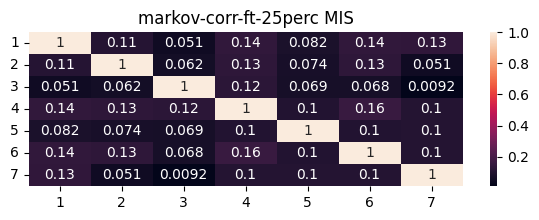

xxxxxxxxxxxxxxxxxxxxxxxxxxx


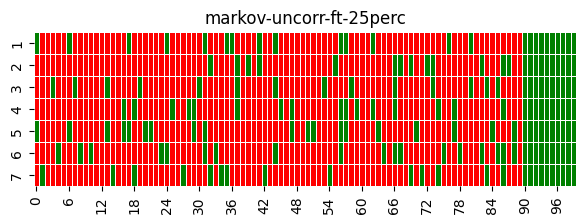

Markov Chains lambda 2:
Countries lambda_2:  [0.32, 0.4, 0.19, 0.24, 0.25, 0.22, 0.25]
Mean lambda_2:  0.27
x --------------- x
Peasron correlation:
Time list:  [0.32, 0.4, 0.19, 0.23, 0.25, 0.22, 0.25]
Time mean:  0.27
Spatial dict:  {'1-2': 0.3, '1-3': 0.34, '1-4': 0.36, '1-5': 0.47, '1-6': 0.38, '1-7': 0.29, '2-3': 0.42, '2-4': 0.38, '2-5': 0.17, '2-6': 0.4, '2-7': 0.42, '3-4': 0.31, '3-5': 0.21, '3-6': 0.33, '3-7': 0.29, '4-5': 0.43, '4-6': 0.29, '4-7': 0.36, '5-6': 0.24, '5-7': 0.16, '6-7': 0.22}
Spatial mean:  0.32
x --------------- x


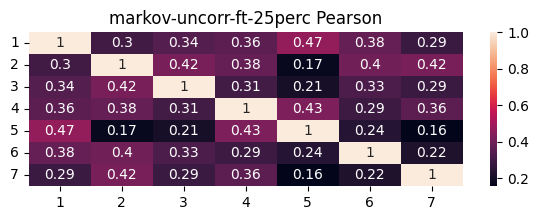

Hamming similarity:
Time list:  [0.76, 0.79, 0.71, 0.71, 0.7, 0.69, 0.73]
Time mean:  0.72
Spatial dict:  {'1-2': 0.75, '1-3': 0.76, '1-4': 0.76, '1-5': 0.79, '1-6': 0.76, '1-7': 0.74, '2-3': 0.79, '2-4': 0.77, '2-5': 0.68, '2-6': 0.77, '2-7': 0.79, '3-4': 0.74, '3-5': 0.69, '3-6': 0.74, '3-7': 0.74, '4-5': 0.77, '4-6': 0.72, '4-7': 0.76, '5-6': 0.69, '5-7': 0.67, '6-7': 0.7}
Spatial mean:  0.74
x --------------- x


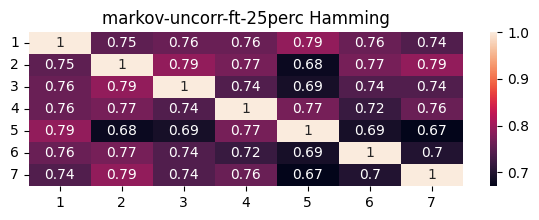

Mutual Information Score:
Time list:  [0.05, 0.07, 0.02, 0.03, 0.03, 0.02, 0.03]
Time mean:  0.03
Spatial dict:  {'1-2': 0.04, '1-3': 0.05, '1-4': 0.06, '1-5': 0.1, '1-6': 0.07, '1-7': 0.04, '2-3': 0.08, '2-4': 0.07, '2-5': 0.01, '2-6': 0.07, '2-7': 0.08, '3-4': 0.04, '3-5': 0.02, '3-6': 0.05, '3-7': 0.04, '4-5': 0.08, '4-6': 0.04, '4-7': 0.06, '5-6': 0.03, '5-7': 0.01, '6-7': 0.02}
Spatial mean:  0.05


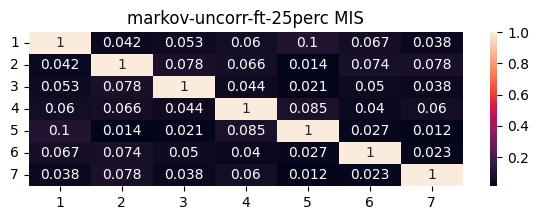

xxxxxxxxxxxxxxxxxxxxxxxxxxx


In [52]:
# av_mat_list = ["gaussian-corr-25","gaussian-corr-exp3","gaussian-corr-ft-exp2",
#                "gaussian-uncorr-exp2-0","gaussian-uncorr-ft","gaussian-corr",
#                "gaussian-corr-ft-25","gaussian-corr-ft-exp3","gaussian-uncorr-exp2",
#                "gaussian-uncorr-ft-exp2-0","gaussian-corr-exp2-0",
#                "gaussian-corr-ft","gaussian-uncorr-25","gaussian-uncorr-exp3",
#                "gaussian-uncorr-ft-exp2","gaussian-corr-exp2",
#                "gaussian-corr-ft-exp2-0","gaussian-uncorr","gaussian-uncorr-ft-25","gaussian-uncorr-ft-exp3"]
# av_mat_name = 'uniform-CI-threshold'

av_mat_list = [
               "markov-corr-25perc",
               "markov-uncorr-25perc","markov-corr-ft-25perc",
               "markov-uncorr-ft-25perc"]
folder=main_folder
for av_mat_name in av_mat_list:
    correlation_analysis(av_mat_name, folder)